# Chapter 6 
 Industrial Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (2023) <br>
<!-- ISBN-13: 978-3031075650 -->

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

# Quality by Design

In [2]:
import random
import itertools
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import mistat

## Offline Quality Control, Parameter Design and the Taguchi Method

### Product and Process Optimization Using Loss Functions

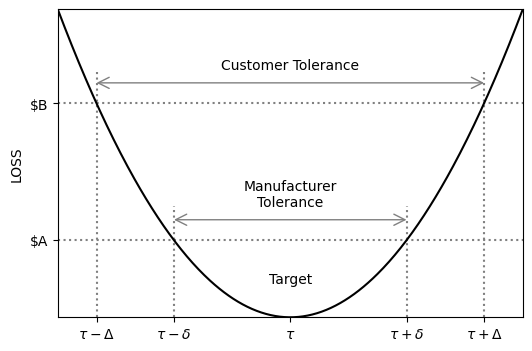

In [3]:
fig, ax = plt.subplots(figsize=[6, 4])

ax.axhline(y=1.5**2, color='gray', ls=':')
ax.axhline(y=2.5**2, color='gray', ls=':')
for x in [-2.5, -1.5, 1.5, 2.5]:
  x2 = x**2 + 1
  ax.plot([x, x], [0, x2], color='gray', ls=':')
prop = {'arrowstyle': "<->,head_width=0.4,head_length=0.8",
        'shrinkA': 0, 'shrinkB': 0, 'color': 'grey'}
for x in [1.5, 2.5]:
  x2 = x**2 + 0.6
  plt.annotate(text='', xy=(-x,x2), xytext=(x,x2), arrowprops=prop)


x = np.linspace(-3, 3, 401)
y = x**2
ax.plot(x, y, c='black')
ax.set_xlim(-3, 3)
ax.set_ylim(0, 9)
ax.set_ylabel('LOSS')

ticks = [0.5,0.6,0.7,0.8,0.9,1.0]
ax.set_xticks([-2.5, -1.5, 0, 1.5, 2.5])
ax.set_xticklabels([r'$\tau-\Delta$',r'$\tau-\delta$',
   r'$\tau$',
   r'$\tau+\delta$',r'$\tau+\Delta$'])
ax.set_yticks([1.5**2, 2.5**2])
ax.set_yticklabels(['$A', '$B'])
ax.text(0, 1, 'Target', horizontalalignment='center')
ax.text(0, 1.5**2 + 1, 'Manufacturer\nTolerance', horizontalalignment='center')
ax.text(0, 2.5**2 + 1, 'Customer Tolerance', horizontalalignment='center')

plt.show()

### Major Stages in Product and Process Design

### Design Parameters and Noise Factors

### Parameter Design Experiments

In [4]:
response = pd.DataFrame([
  [-1, -1, -1, 60.5, 61.7, 60.5, 60.8],
  [ 1, -1, -1, 47.0, 46.3, 46.7, 47.2],
  [-1,  1, -1, 92.1, 91.0, 92.0, 91.6],
  [ 1,  1, -1, 71.0, 71.7, 71.1, 70.0],
  [-1, -1,  1, 65.2, 66.8, 64.3, 65.2],
  [ 1, -1,  1, 49.5, 50.6, 49.5, 50.5],
  [-1,  1,  1, 91.2, 90.5, 91.5, 88.7],
  [ 1,  1,  1, 76.0, 76.0, 78.3, 76.4],
], columns=['A', 'B', 'C', 'y1', 'y2', 'y3', 'y4'])
response['Ymean'] = response[['y1', 'y2', 'y3', 'y4']].mean(axis=1)
response['S'] = response[['y1', 'y2', 'y3', 'y4']].std(ddof=0, axis=1)

In [5]:
response

,A,B,C,y1,y2,y3,y4,Ymean,S
0,-1,-1,-1,60.5,61.7,60.5,60.8,60.875,0.491808
1,1,-1,-1,47.0,46.3,46.7,47.2,46.800,0.339116
2,-1,1,-1,92.1,91.0,92.0,91.6,91.675,0.432290
3,1,1,-1,71.0,71.7,71.1,70.0,70.950,0.610328
4,-1,-1,1,65.2,66.8,64.3,65.2,65.375,0.901041
5,1,-1,1,49.5,50.6,49.5,50.5,50.025,0.526189
6,-1,1,1,91.2,90.5,91.5,88.7,90.475,1.087141
7,1,1,1,76.0,76.0,78.3,76.4,76.675,0.952300


In [6]:
model = smf.ols('Ymean ~ A + B + C', data=response).fit()
print(f'rsquared: {model.rsquared:.3f}')
model_S = smf.ols('S ~ A + B + C', data=response).fit()
print(f'rsquared: {model_S.rsquared:.3f}')

rsquared: 0.991
rsquared: 0.816


### Performance Statistics

## The Effects of Non-linearity

In [7]:
np.random.seed(seed=1)

def Y(R, L, V, f):
  d = R**2 + (2*np.pi*f*L)**2
  return V / np.sqrt(d)
R = 5
L = 0.02
V = stats.norm.rvs(loc=100, scale=np.sqrt(9), size=500)
f = stats.norm.rvs(loc=55, scale=np.sqrt(25/9), size=500)
Ysimulated = Y(R, L, V, f)
Ymean = np.mean(Ysimulated)
Yvar = np.var(Ysimulated)
delta = 2 * np.sqrt(Yvar / 500)
CI = (Ymean - delta, Ymean + delta)

In [8]:
from mistat.design import doe
np.random.seed(1)

# Build design from factors
FacDesign = doe.full_fact({
    'R': [0.05, 5, 9.5],
    'L': [0.01, 0.02, 0.03],
})
results = []
for _, (R, L) in FacDesign.iterrows():
  V = stats.norm.rvs(loc=100, scale=np.sqrt(9), size=500)
  f = stats.norm.rvs(loc=55, scale=np.sqrt(25/9), size=500)

  Ysimulated = Y(R, L, V, f)
  Ymean = np.mean(Ysimulated)
  Yvar = np.var(Ysimulated)

  target = 10
  MSE = (Ymean - target) **2 + Yvar
  results.append({
    'R': R,
    'L': L,
    'Ymean': Ymean,
    'Yvar': Yvar,
    'MSE': MSE,
  })
results = pd.DataFrame(results)

In [9]:
results

,R,L,Ymean,Yvar,MSE
0,0.05,0.01,28.984140,1.446125,361.843679
1,5.00,0.01,16.494567,0.274769,42.454168
2,9.50,0.01,9.888878,0.088574,0.100922
3,0.05,0.02,14.509948,0.396108,20.735743
4,5.00,0.02,11.720708,0.181956,3.142793
5,9.50,0.02,8.515011,0.072463,2.277656
6,0.05,0.03,9.667577,0.169651,0.280157
7,5.00,0.03,8.676023,0.125651,1.878566
8,9.50,0.03,7.109422,0.062426,8.417865


## Taguchi's Designs

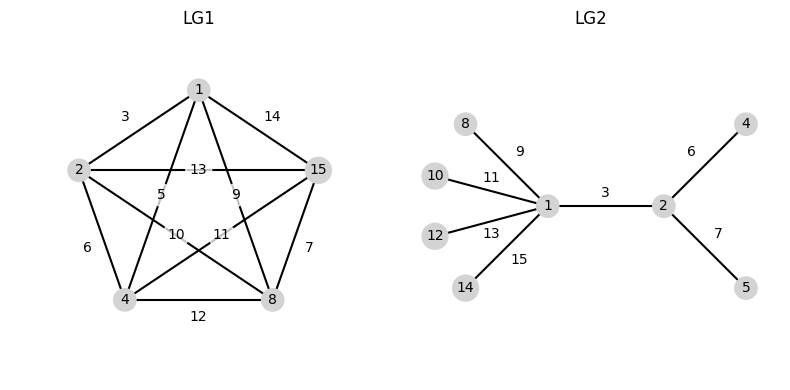

In [10]:
fig, axes = plt.subplots(ncols=2, figsize=(8,4))

def drawFactor(x,y, factor, ax):
  ax.text(x, y, factor, ha='center', va='center',
          bbox={'boxstyle' : 'circle', 'color':'lightgrey'})
def drawInteraction(f1, f2, dx, dy, interaction, ax, alpha=0):
  ax.plot([f1[0], f2[0]], [f1[1], f2[1]], color='black')
  ax.text(0.5*(f1[0] + f2[0]) + dx, 0.5*(f1[1] + f2[1]) + dy, interaction,
          ha='center', va='center',
          bbox={'boxstyle' : 'circle', 'color':'white', 'alpha': alpha})
ax = axes[0]
d = 2
factors = {
  1: (0, d),
  2: (-d * 0.951, d * 0.309),
  15: (d * 0.951, d * 0.309),
  4: (-d * 0.5877, -d * 0.809),
  8: ( d * 0.5877, -d * 0.809),
}
d = np.sqrt(0.05)
interactions = {
  3: (1, 2, -d, d),
  5: (1, 4, 0, 0),
  9: (1, 8, 0, 0),
  14: (1, 15, d, d),
  6: (2, 4, -d, -d),
  7: (8, 15,  d, -d),
  10: (2, 8, 0, 0),
  11: (4, 15, 0, 0),
  13: (2, 15, 0, 0),
  12: (4, 8, 0, -d-0.065),
}
for interaction, (f1, f2, dx, dy) in interactions.items():
  drawInteraction(factors[f1], factors[f2], dx, dy, interaction, ax, alpha=0.75)
for factor, (x,y) in factors.items():
  drawFactor(x, y, factor, ax)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_title('LG1')
plt.sca(ax)
plt.axis('off')

ax = axes[1]
d = np.sqrt(2)
factors = {
  1: (-1, 0),
  2: (1, 0),
  4: (1 + d, d),
  5: (1 + d, -d),
  8: (-1 - d, d),
  10: (-1 - 2 * 0.97, 2 * 0.26),
  12: (-1 - 2 * 0.97, -2 * 0.26),
  14: (-1 - d, -d),
}
d = np.sqrt(0.05)
interactions = {
  3: (1, 2, 0, d),
  6: (2, 4, -d, d),
  7: (2, 5, d, d),
  9: (1, 8, d, d),
  11: (1, 10, 0, d),
  13: (1, 12, 0, -d),
  15: (1, 14, d, -d),
}
for interaction, (f1, f2, dx, dy) in interactions.items():
  drawInteraction(factors[f1], factors[f2], dx, dy, interaction, ax)
for factor, (x,y) in factors.items():
  drawFactor(x, y, factor, ax)
ax.set_xlim(-3.5, 3)
ax.set_ylim(-3, 3)
ax.set_title('LG2')
plt.sca(ax)
plt.axis('off')
plt.tight_layout()
plt.show()

## Quality by Design in the Pharmaceutical Industry

### Introduction to Quality by Design

### A Quality by Design Case Study: The Full Factorial Design

In [11]:
# data loading and preprocessing
df = mistat.load_data('QBD')
df.columns = [s.replace(' ', '_').replace('-', '_') for s in df.columns]
predictors = ['Temp', 'Blending_Time', 'Cooling_Time']
outcome = 'Viscosity'
data = df[predictors + [outcome]]

# convert data to factors
FFdesign = data.copy()
for predictor in predictors:
    values = FFdesign[predictor]
    toFactor = {min(values): -1, max(values): 1, np.mean(values): 0}
    values = [toFactor[v] for v in values]
    FFdesign[predictor] = values
FFdesign = FFdesign.sort_values(by=['Cooling_Time', 'Blending_Time', 'Temp'])
FFdesign = FFdesign.reset_index(drop=True)

formula = 'Viscosity ~ (Temp + Blending_Time + Cooling_Time)**2'
ff_model = smf.ols(formula=formula, data=FFdesign).fit()
FFdesign['predicted'] = ff_model.predict(FFdesign)

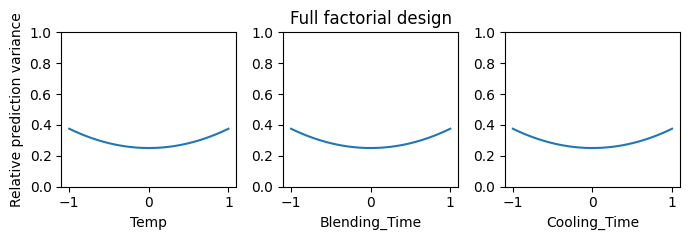

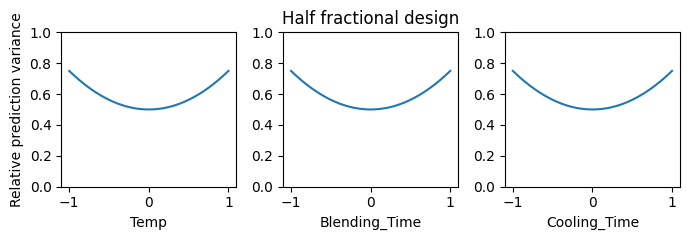

In [12]:
# define a utility function to create sequences of numbers
def paddedRange(values, padding=0.1):
    vmin = values.min()
    vmax = values.max()
    delta = padding*(vmax - vmin)
    return (vmin - delta, vmax + delta)

def calculateRelVariance(design, fixedFactors):
    freeFactors = [c for c in design.columns if c not in fixedFactors]
    if len(freeFactors) != 1:
        raise ValueError('You can have only one free factors')
    freeFactor = freeFactors[0]

    def linspace(limits):
        lmin, lmax = paddedRange(limits, padding=0)
        return np.linspace(lmin, lmax)
    xf = linspace(design[freeFactor])
    data = pd.DataFrame({
        f: xf if f == freeFactor else fixedFactors[f] for f in design.columns
    })

    XXm1 = np.linalg.inv(np.matmul(design.transpose(), np.array(design)))
    
    relVar = []
    for _, x in data.iterrows():
        relVar.append(np.matmul(x.transpose(), np.matmul(XXm1, x)))
    data['relVariance'] = relVar
    return data


def visualizeDesign(design, title):
    fig, axes = plt.subplots(ncols=3, figsize=[7, 2.5])
    for factor, ax in zip(predictors, axes): 
        fixed = [f for f in design.columns if f != factor]
        fixedFactors = {fixed[0]: 1, fixed[1]: 1}

        x = calculateRelVariance(design[predictors], fixedFactors)
        ax.plot(x[factor], x['relVariance'])
        ax.set_ylim(0, 1)
        ax.set_xlabel(factor)
        if ax == axes[0]:
            ax.set_ylabel('Relative prediction variance')
    axes[1].set_title(title)
    plt.tight_layout()
    plt.show()
    
# convert data to factors
visualizeDesign(FFdesign, 'Full factorial design')
HFdesign = FFdesign.iloc[[0, 3, 7, 8], :]
visualizeDesign(HFdesign, 'Half fractional design')

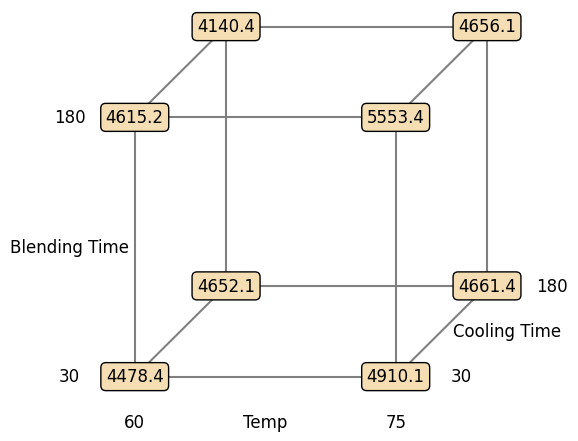

In [13]:
corners = list(itertools.product([-1, 1], repeat=3))

def cornerPosition(corner, offset=0.35):
    return (corner[0] + offset*corner[2], 
            corner[1] + offset*corner[2])
    

def drawFace(ax, corners):
    for i1, c1 in enumerate(corners[:-1], 1):
        p1 = cornerPosition(c1)
        for c2 in corners[i1:]:
            differences = sum(c1i != c2i for c1i, c2i in zip(c1, c2))
            if differences != 1:
                continue
            p2 = cornerPosition(c2)
            ax.plot((p1[0], p2[0]), (p1[1], p2[1]), color='grey')

def drawPredictions(ax, corners, data):
    props = {
        'verticalalignment': 'center', 
        'horizontalalignment': 'center',
        'fontsize': 12,
        'bbox': {'boxstyle': 'round', 'facecolor': 'wheat'}
    }
    for corner in corners:
        row = data[(data['Temp'] == corner[0]) &
                   (data['Blending_Time'] == corner[1]) &
                   (data['Cooling_Time'] == corner[2])]
        p = cornerPosition(corner)
        text = f'{row["predicted"].values[0]:.1f}'
        ax.text(p[0], p[1], text, **props)
        
def drawLabels(ax):
    props = {
        'verticalalignment': 'center', 
        'horizontalalignment': 'center',
        'fontsize': 12,
    }
    def plotLabel(p1, p2, label, left, right):
        ax.text(p1[0], p1[1], left, **props)
        ax.text(p2[0], p2[1], right, **props)
        pmid = np.mean(list(zip(p1, p2)), axis=1)
        ax.text(pmid[0], pmid[1], label, **props)

    # Temperatur
    p1 = list(cornerPosition((-1, -1, -1)))
    p2 = list(cornerPosition((1, -1, -1)))
    p1[1] -= 0.35
    p2[1] -= 0.35
    plotLabel(p1, p2, 'Temp', '60', '75')
    # Cooling Time
    p1 = list(cornerPosition((1, -1, -1)))
    p2 = list(cornerPosition((1, -1, 1)))
    p1[0] += 0.5
    p2[0] += 0.5
    plotLabel(p1, p2, 'Cooling Time', '30', '180')
    # Blending Time
    p1 = list(cornerPosition((-1, -1, -1)))
    p2 = list(cornerPosition((-1, 1, -1)))
    p1[0] -= 0.5
    p2[0] -= 0.5
    plotLabel(p1, p2, 'Blending Time', '30', '180')
    

fig, ax = plt.subplots(figsize=(5, 5))
drawFace(ax, corners)
drawPredictions(ax, corners, FFdesign)

drawLabels(ax)
plt.axis('off')
plt.show()

In [14]:
# ignore ValueWarning for Kurtosis-test due to small dataset
import warnings
warnings.simplefilter('ignore', category=UserWarning)

In [15]:
coefficients = ff_model.summary2().tables[1]
coefficients

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,4708.400,173.567436,27.127208,0.000110,4156.030953,5260.769047
Temp,236.875,194.054293,1.220664,0.309404,-380.692369,854.442369
Blending_Time,32.875,194.054293,0.169411,0.876252,-584.692369,650.442369
Cooling_Time,-180.875,194.054293,-0.932085,0.420049,-798.442369,436.692369
Temp:Blending_Time,126.625,194.054293,0.652524,0.560604,-490.942369,744.192369
Temp:Cooling_Time,-105.625,194.054293,-0.544306,0.624080,-723.192369,511.942369
Blending_Time:Cooling_Time,-162.125,194.054293,-0.835462,0.464767,-779.692369,455.442369


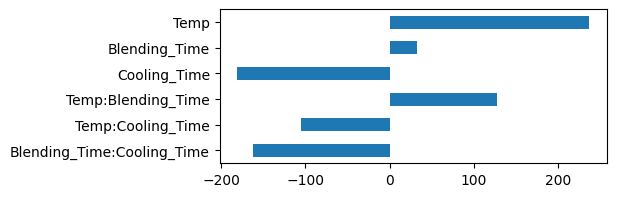

In [16]:
fig, ax = plt.subplots(figsize=(5, 2))
coefficients['Coef.'][1:][::-1].plot.barh(ax=ax)
plt.show()

In [17]:
# add additional feature that identifies the center point
FFdesign['center'] = [1 if t == 0 else 0 for t in FFdesign['Temp']]
# and include it in the model
formula = 'Viscosity ~ (Temp + Blending_Time + Cooling_Time)**2 + center'
ff_model_center = smf.ols(formula=formula, data=FFdesign).fit()

In [18]:
coefficients = ff_model.summary2().tables[1]
coefficients

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,4708.400,173.567436,27.127208,0.000110,4156.030953,5260.769047
Temp,236.875,194.054293,1.220664,0.309404,-380.692369,854.442369
Blending_Time,32.875,194.054293,0.169411,0.876252,-584.692369,650.442369
Cooling_Time,-180.875,194.054293,-0.932085,0.420049,-798.442369,436.692369
Temp:Blending_Time,126.625,194.054293,0.652524,0.560604,-490.942369,744.192369
Temp:Cooling_Time,-105.625,194.054293,-0.544306,0.624080,-723.192369,511.942369
Blending_Time:Cooling_Time,-162.125,194.054293,-0.835462,0.464767,-779.692369,455.442369


In [19]:
# restore default setting
warnings.simplefilter('default', category=UserWarning)

### A Quality by Design Case Study: The Desirability Function

In [20]:
# define functions that generate a variety of profiles
# note that the function returns a function profile(x)
def rampProfile(lower, upper, reverse=False):
    def wrapped(x):
        condlist = [x < lower, x >= lower, x > upper]
        funclist = [0, lambda x: (x-lower)/(upper-lower), 1]
        if reverse:
            funclist = [1, lambda x: (upper-x)/(upper-lower), 0]
        return np.piecewise(x, condlist, funclist)
    return wrapped

def triangleProfile(lower, middle, upper):
    def wrapped(x):
        condlist = [x < lower, x >= lower, x >= middle, x >= upper]
        funclist = [0, lambda x: (x-lower)/(middle-lower), 
                    lambda x: (upper-x) / (upper-middle), 0]
        return np.piecewise(x, condlist, funclist)
    return wrapped

desirabilityProfiles = {
    'Active_Assay': rampProfile(95, 105),
    'In_Vitro_Lower': rampProfile(80, 125),
    'In_Vitro_Upper': rampProfile(110, 135, reverse=True),
    'D90': triangleProfile(1, 1.5, 2),
    'A_Assay': rampProfile(95, 105),
    'B_Assay': rampProfile(95, 105),
    'Viscosity': triangleProfile(4000, 5000, 5750),
    'pH': triangleProfile(4.7, 5.2, 5.6),
}

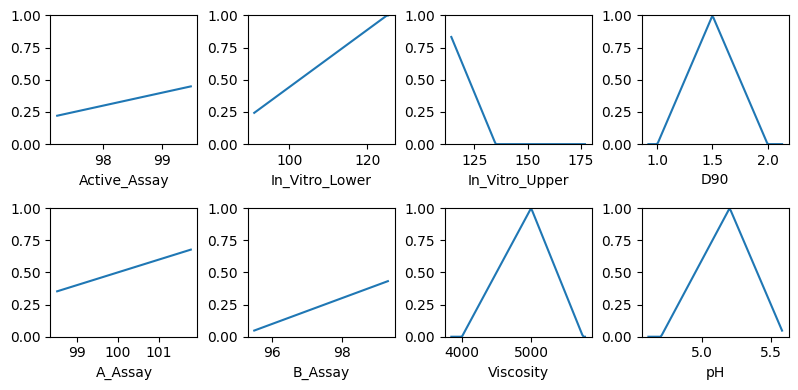

In [21]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=[8, 4])
for ax, response in zip(itertools.chain(*axes), desirabilityProfiles):
    xmin, xmax = paddedRange(df[response], padding=0.1)
    x = np.linspace(xmin, xmax, 100)
    y = desirabilityProfiles[response](x)
    ax.plot(x, y)
    ax.set_ylim(0, 1)
    ax.set_xlabel(response)

plt.tight_layout()
plt.show()

In [22]:
def overallDesirability(x):
    x = np.array(list(x))
    if any(xi == 0 for xi in x): # handle 0-desirability case
        return 0
    return stats.gmean(x)

def calculateDesirability(target, models, desirabilityProfiles):
    targetPredictions = {response: model.predict(target).values[0]
                         for response, model in models.items()}
    
    # determine overall desirability for targetPredictions
    targetDesirabilities = {response: float(desirabilityProfiles[response](value))
                            for response, value in targetPredictions.items()}

    targetDesirabilities['overall'] = overallDesirability(targetDesirabilities.values())

    return {
      'individual': pd.DataFrame({'predictions': targetPredictions, 
                                  'desirability': targetDesirabilities}),
      'overall': overallDesirability(targetDesirabilities.values()),
    }

models = {}
for response in desirabilityProfiles:
    formula = f'{response} ~ (Temp + Blending_Time + Cooling_Time)**2'
    models[response] = smf.ols(formula=formula, data=df).fit()

target = pd.DataFrame(
    {'Temp': 65, 'Blending_Time': 2.5, 'Cooling_Time': 150},
    index=['target'])

targetDesirabilities = calculateDesirability(target, models, desirabilityProfiles)
targetDesirabilities['overall']

0.33976276040552145

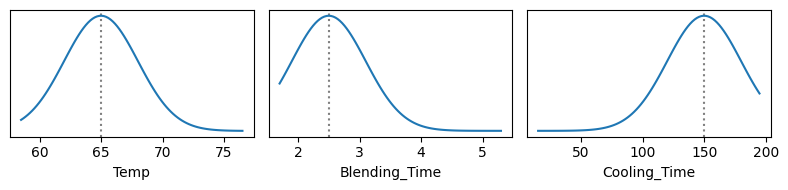

In [23]:
variability = {
    'Temp': stats.norm(loc=65, scale=3),
    'Blending_Time': stats.norm(loc=2.5, scale=0.6),
    'Cooling_Time': stats.norm(loc=150, scale=30),
}

fig, axes = plt.subplots(ncols=3, figsize=[8, 2])
for ax, factor in zip(axes, target):
    xrange = paddedRange(df[factor])
    x = np.linspace(xrange[0], xrange[1], 100)
    y = variability[factor].pdf(x)
    ax.axvline(target[factor].values[0], color='grey', linestyle=':')
    ax.plot(x, y)
    ax.set_xlabel(factor)
    ax.set_yticks([])
plt.tight_layout()

In [24]:
variability = {
    'Temp': stats.norm(loc=65, scale=3),
    'Blending_Time': stats.norm(loc=2.5, scale=0.6),
    'Cooling_Time': stats.norm(loc=150, scale=30),
}

In [25]:
# simulate data with variability around the target settings
np.random.seed(1)
random_df = pd.DataFrame({
    factor: variability[factor].rvs(5000)
    for factor in target
})

predictions = {response: model.predict(random_df)
               for response, model in models.items()}

variableDesirabilities = pd.DataFrame({
    response: desirability(predictions[response].values)
    for response, desirability in desirabilityProfiles.items()
})

variableDesirabilities['overall'] = \
       variableDesirabilities.apply(overallDesirability, axis=1)

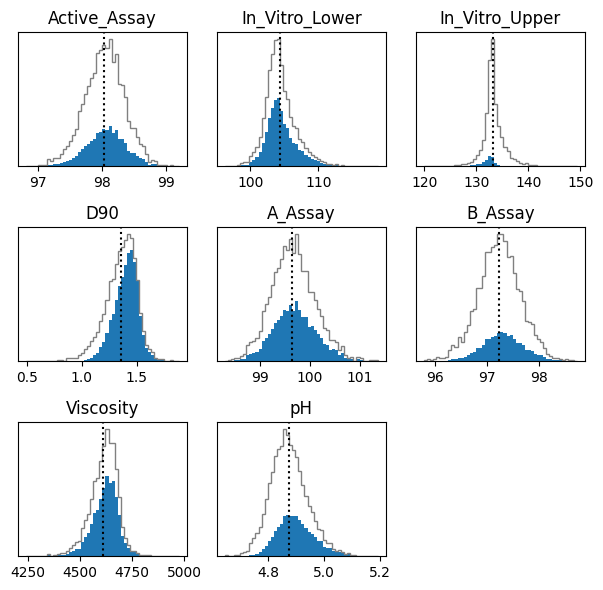

In [26]:
targetPredictions = {response: float(model.predict(target))
                     for response, model in models.items()}

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=[6, 6])
nbins = 50
for ax, response in zip(itertools.chain(*axes), desirabilityProfiles):
    x = predictions[response]
    y = variableDesirabilities[response]
    ax.hist(x, bins=nbins, histtype='step', color='grey')
    ax.hist(x, weights=y, bins=nbins, color='C0')
    ax.set_title(response)
    ax.axvline(targetPredictions[response], color='black', linestyle=':')
    ax.set_yticks([])
axes[2,2].axis('off')
plt.tight_layout()
plt.show()

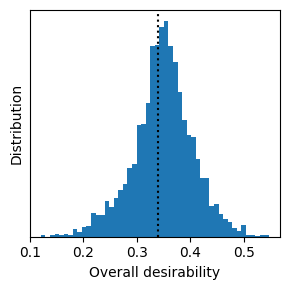

In [27]:
fig, ax = plt.subplots(figsize=[3, 3])
x = variableDesirabilities['overall']
ax.hist(x[x>0], bins=nbins)
ax.axvline(targetDesirabilities['overall'], color='black', linestyle=':')
ax.set_xlabel('Overall desirability')
ax.set_ylabel('Distribution')
ax.set_yticks([])
plt.tight_layout()
plt.show()

### A Quality by Design Case Study: The Design Space

In [28]:
def plotSurface(models, target, f1, f2, ncontours=20, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    
    def linspace(limits):
        lmin, lmax = paddedRange(limits, padding=0)
        return np.linspace(lmin, lmax)
    x1 = linspace(data[f1])
    x2 = linspace(data[f2])
    X1, X2 = np.meshgrid(x1, x2)

    grid = {f1: X1.ravel(), f2: X2.ravel()}
    for f in target:
        if f in (f1, f2):
            continue
        grid[f] = target[f].values[0]
    df = pd.DataFrame(grid)
    
    # first draw area of undesirability
    model = models['In_Vitro_Upper']
    Y = np.array(model.predict(df))
    cs = ax.contourf(X1, X2, Y.reshape(len(X2), len(X1)), levels=[133, 135],
    colors=['white', '#C4DFEB', '#73A7B8'], extend='both')
    
    targetPredictions = {response: model.predict(target).values[0]
                   for response, model in models.items()}    
    for idx, response in enumerate(models):
        if response == 'In_Vitro_Upper':
            continue
        model = models[response]
        levels = [targetPredictions[response]]
        Y = np.array(model.predict(df))
        CS = ax.contour(X1, X2,
                    Y.reshape(len(X2), len(X1)),
                    levels, colors=f'C{idx}')
        ax.clabel(CS, inline=True, fontsize=10)
        ax.set_xlabel(f1)
        ax.set_ylabel(f2)
    return ax

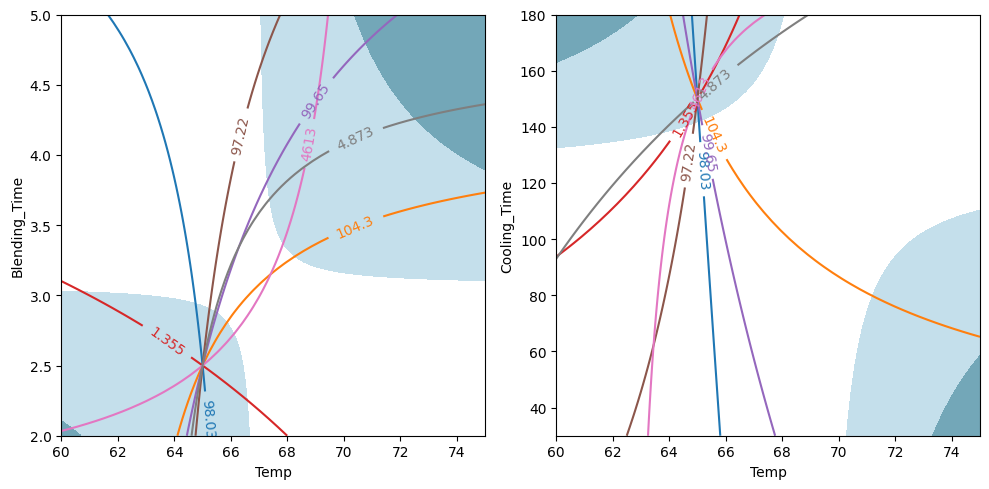

In [29]:
target = pd.DataFrame(
    {'Temp': 65, 'Blending_Time': 2.5, 'Cooling_Time': 150},
    index=['target'])

fig, axes = plt.subplots(ncols=2, figsize=[10, 5])
plotSurface(models, target, 'Temp', 'Blending_Time', ax=axes[0])
plotSurface(models, target, 'Temp', 'Cooling_Time', ax=axes[1])
plt.tight_layout()
plt.show()

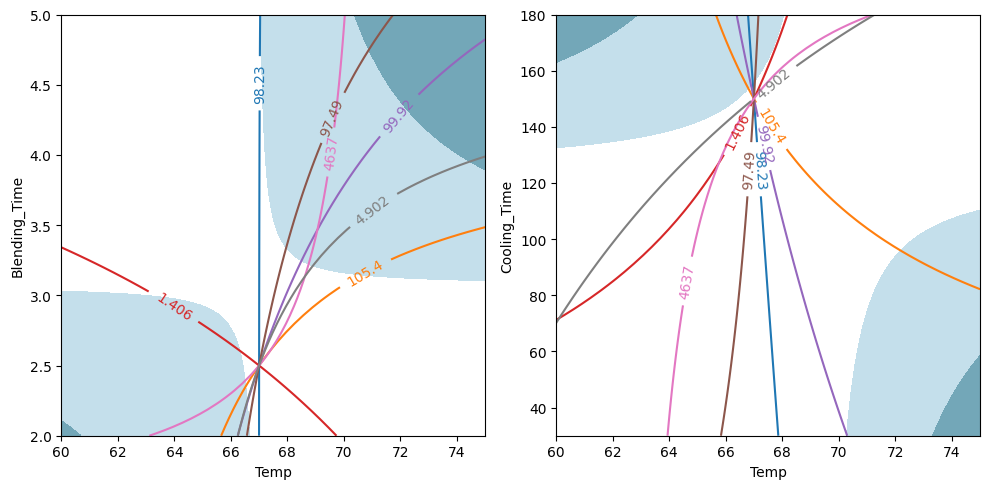

In [30]:
targetNew = target.copy()
targetNew['Temp'] = [67]
fig, axes = plt.subplots(ncols=2, figsize=[10, 5])
plotSurface(models, targetNew, 'Temp', 'Blending_Time', ax=axes[0])
plotSurface(models, targetNew, 'Temp', 'Cooling_Time', ax=axes[1])
plt.tight_layout()
plt.show()

## Tolerance Designs

In [31]:
tolerances = [c for c in 'ABCDEFGHIJKLM']
factors = {tl: [1, 2] for tl in tolerances}

Design = doe.frac_fact_res(factors, 4)
Design.index = range(1, len(Design) + 1)
Design = Design.astype(np.int64)

In [32]:
Design

,A,B,C,D,E,F,G,H,I,J,K,L,M
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,1,1,1,1,2,2,2,2,2,2,1,1
3,1,2,1,1,1,2,2,2,1,1,1,2,2
4,2,2,1,1,1,1,1,1,2,2,2,2,2
5,1,1,2,1,1,2,1,1,2,2,1,2,2
6,2,1,2,1,1,1,2,2,1,1,2,2,2
7,1,2,2,1,1,1,2,2,2,2,1,1,1
8,2,2,2,1,1,2,1,1,1,1,2,1,1
9,1,1,1,2,1,1,2,1,2,1,2,2,1
10,2,1,1,2,1,2,1,2,1,2,1,2,1


In [33]:
np.random.seed(1)

# Prepare design
tolerances = [f'tl{c}' for c in 'ABCDEFGHIJKLM']
factors = {tl: [5, 10] for tl in tolerances}
Design = doe.frac_fact_res(factors, 4)

# Randomize and create replicates
nrepeat = 100
Design = Design.sample(frac=1).reset_index(drop=True)
Design = Design.loc[Design.index.repeat(nrepeat)].reset_index(drop=True)

# Run simulation
simulator = mistat.PowerCircuitSimulation(**{k: list(Design[k]) for k in Design})
result = simulator.simulate()
result = mistat.simulationGroup(result, nrepeat)

Design['response'] = result['volts']
Design['group'] = result['group']

# calculate mean, standard deviation, and total cost for each group
def groupAggregation(g):
    # calculate cost of design (tolerance 10 = 0.5, tolerance 5 = 1)
    groupTolerances = g.iloc[0,:][tolerances]
    tc = 0.5 * sum(groupTolerances == 10) + 1 * sum(groupTolerances == 5)
    return {
        'Mean': g['response'].mean(),
        'STD': g['response'].std(),
        'MSE': g['response'].var(ddof=0),
        'TC': tc,
        **groupTolerances,
    }
results = pd.DataFrame(list(Design.groupby('group').apply(groupAggregation, include_groups=False)))

In [34]:
table = results[['Mean', 'STD', 'MSE', 'TC']]
table.index = range(1, len(table) + 1)
table = table.round({'Mean': 2, 'STD': 4, 'MSE': 4})
table['TC'] = table['TC'].astype(np.int64)

In [35]:
table.sort_values(by='MSE')

,Mean,STD,MSE,TC
24,230.32,3.5976,12.8130,13
27,229.43,4.3597,18.8173,10
29,229.80,4.4109,19.2617,10
31,230.99,4.6552,21.4542,10
15,230.85,4.7367,22.2119,10
30,230.91,4.7774,22.5954,9
7,229.93,4.8452,23.2415,10
3,230.03,4.8563,23.3477,9
21,229.73,4.9575,24.3307,9
4,229.60,5.1094,25.8444,9


## Case Studies

### The Quinlan Experiment

In [36]:
flexprod = mistat.load_data('FLEXPROD')
flexprod.index = range(1, len(flexprod) + 1)

In [37]:
flexprod

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,SN
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6.26
2,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,4.80
3,1,1,1,2,2,2,2,1,1,1,1,2,2,2,2,21.04
4,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,15.11
5,1,2,2,1,1,2,2,1,1,2,2,1,1,2,2,14.03
6,1,2,2,1,1,2,2,2,2,1,1,2,2,1,1,16.69
7,1,2,2,2,2,1,1,1,1,2,2,2,2,1,1,12.91
8,1,2,2,2,2,1,1,2,2,1,1,1,1,2,2,15.05
9,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,17.67
10,2,1,2,1,2,1,2,2,1,2,1,2,1,2,1,17.27


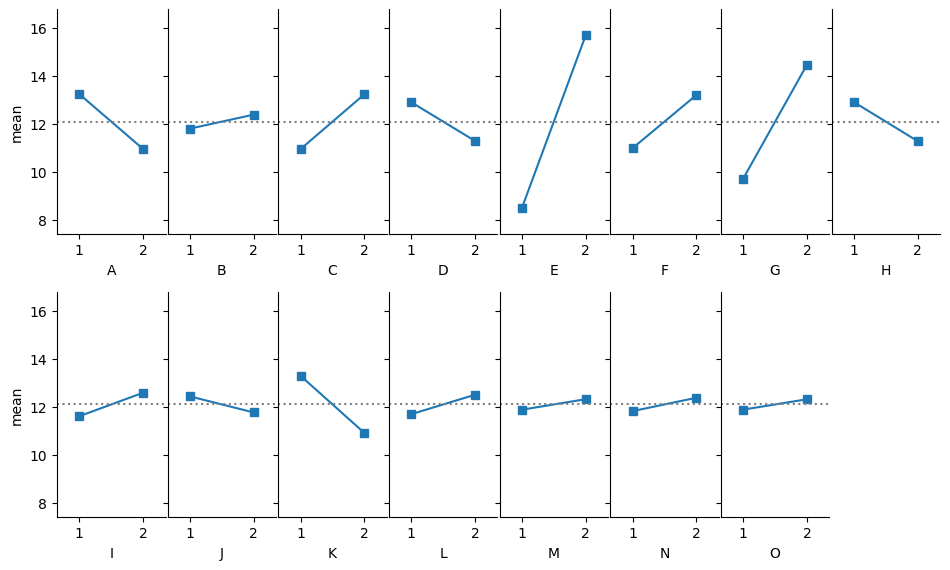

In [38]:
flexprod = mistat.load_data('FLEXPROD')
mistat.mainEffectsPlot(flexprod, 'SN', col_wrap=8)

In [39]:
for c in flexprod.columns:
    if c == 'SN':
        continue
    flexprod[c] = [-1 if v == 1 else 1 for v in flexprod[c]]
model = smf.ols('SN ~ A+B+C+D+E+F+G+H+I+J+K+L+M+N+O', data=flexprod).fit()
model.params

Intercept    12.091875
A            -1.144375
B             0.291875
C             1.141875
D            -0.806875
E             3.598125
F             1.106875
G             2.374375
H            -0.813125
I             0.489375
J            -0.334375
K            -1.189375
L             0.404375
M             0.219375
N             0.278125
O             0.215625
dtype: float64

### Computer Response Time Optimization

In [40]:
compuresp = mistat.load_data('COMPURESP')
compuresp.index = range(1, len(compuresp) + 1)

In [41]:
compuresp

,F,B,C,D,E,A,G,H,Mean,SN
1,1,1,1,1,1,1,1,1,4.65,-14.66
2,1,1,2,2,2,2,2,2,5.28,-16.37
3,1,1,3,3,3,3,3,3,3.06,-10.49
4,1,2,1,1,2,2,3,3,4.53,-14.85
5,1,2,2,2,3,3,1,1,3.26,-10.94
6,1,2,3,3,1,1,2,2,4.55,-14.96
7,1,3,1,2,1,3,2,3,3.37,-11.77
8,1,3,2,3,2,1,3,1,5.62,-16.72
9,1,3,3,1,3,2,1,2,4.87,-14.67
10,2,1,1,3,3,2,2,1,4.13,-13.52


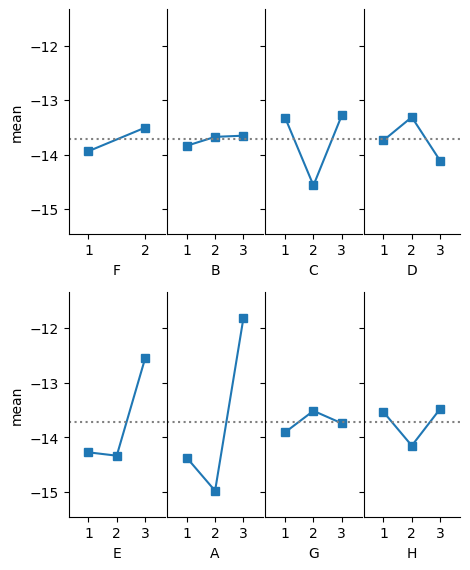

In [42]:
compuresp = mistat.load_data('COMPURESP')
mistat.mainEffectsPlot(compuresp, 'SN', factors='FBCDEAGH', col_wrap=4)

## Chapter Highlights

## Exercises